In [20]:
import scipy.stats as stats
from scipy.stats import chisquare, chi2_contingency
import statsmodels.stats.multicomp
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import random
import pandas as pd
import math
from matplotlib import rc
from matplotlib import rcParams

In [4]:
# Here is the data with no need for external files
b5counts_no_index={4: {'D': 11, 'R': 9, 'A': 50, 'L': 6, 'N': 9, 'S': 10, 'V': 15, 'T': 17, 'F': 5, 'K': 19, 'G': 26, 'C': 2, 'H': 6, 'E': 13, 'I': 5, 'P': 19, 'Q': 22, 'M': 5, 'Y': 3}, 3: {'A': 18, 'G': 6, 'K': 7, 'V': 3, 'E': 3, 'N': 1, 'P': 4, 'T': 1, 'D': 2, 'Q': 3}, 2: {'A': 4, 'P': 1, 'E': 1}}
s5counts_no_index={3: {'D': 10, 'G': 2, 'W': 2, 'T': 3, 'E': 1, 'Q': 1, 'P': 1, 'L': 1, 'H': 1, 'R': 1, 'M': 1}, 4: {'G': 24, 'D': 28, 'W': 6, 'Q': 4, 'T': 10, 'I': 9, 'K': 5, 'Y': 7, 'N': 14, 'A': 7, 'F': 18, 'P': 7, 'L': 5, 'H': 3, 'E': 3, 'S': 5, 'R': 5, 'M': 6, 'C': 1, 'V': 5}}
t5counts_no_index={4: {'D': 162, 'I': 54, 'M': 52, 'G': 135, 'N': 75, 'Q': 50, 'V': 88, 'K': 67, 'Y': 66, 'E': 92, 'R': 51, 'T': 93, 'W': 40, 'F': 63, 'L': 58, 'A': 121, 'P': 70, 'H': 42, 'S': 69, 'C': 20}, 3: {'T': 12, 'G': 21, 'D': 34, 'I': 4, 'A': 14, 'N': 5, 'E': 6, 'M': 2, 'S': 1, 'R': 2, 'F': 2, 'Y': 2, 'P': 5, 'V': 3, 'L': 1}, 2: {'G': 2, 'D': 5, 'T': 1}}
t10counts_no_index={4: {'E': 18, 'K': 12, 'T': 8, 'G': 19, 'P': 10, 'L': 11, 'R': 10, 'S': 6, 'I': 7, 'V': 9, 'D': 9, 'A': 18, 'M': 7, 'Y': 2, 'N': 2, 'H': 3, 'F': 1}, 3: {'E': 21, 'R': 9, 'A': 22, 'V': 16, 'G': 22, 'K': 7, 'P': 5, 'M': 6, 'D': 8, 'C': 2, 'L': 4, 'Q': 1}, 2: {'C': 4, 'G': 1, 'P': 1, 'E': 1, 'R': 1}}


In [5]:
def stars(groupA, groupB, kmer_length, ind):
    totalA=sum(groupA[kmer_length].values())
    totalB=sum(groupB[kmer_length].values())
    pvals=[]
    for amino_acid in ind:
        try:
            Apos=groupA[kmer_length][amino_acid]
        except:
            Apos=0
        Aneg=totalA-Apos
        try:
            Bpos=groupB[kmer_length][amino_acid]
        except:
            Bpos=0
        Bneg=totalB-Bpos
        oddsratio, pvalue = stats.fisher_exact([[Apos, Aneg], [Bpos, Bneg]])
        pvals.append(pvalue)        
    qvals=statsmodels.stats.multitest.multipletests(pvals, alpha=0.15, method='fdr_bh', is_sorted=False, returnsorted=False)
    ret=[]
    for q in qvals[1]:
        if q < 0.05:
            ret.append("*")
        else:
            ret.append(" ")
    print(pvals)
    print(qvals[1])
    print(ret)
    return(ret)


In [47]:
def barchart2(blue,orange,number,blue_label,orange_label, ymax,filename):
    rcParams['font.family'] = 'sans-serif'
    rcParams['font.sans-serif'] = ['Arial']
    #Asp D, Glu E,    
    #Lys K, Arg R, His H
    #Ser S, Thr T, Cys C, Tyr Y, Asp N, Gln Q
    #Gly G, Ala A, Val V, Leu L, Ile I, Phe F, Trp W, Met M, Pro P
    ind=['D','E','K','R','H','S','T','C','Y','N','Q','G','A','V','L','I','F','W','M','P']
    labels=[r'$\underline{\underline{Asp}}$',r'$\underline{\underline{Glu}}$',r'$\underline{Lys}$','Arg','His',r'$\underline{\underline{Ser}}$',r'$\underline{\underline{Thr}}$','Cys',r'$\underline{Tyr}$','Asn','Gln',r'$\underline{\underline{Gly}}$',r'$\underline{\underline{Ala}}$',r'$\underline{\underline{Val}}$',r'$\underline{\underline{Leu}}$',r'$\underline{\underline{Ile}}$',r'$\underline{Phe}$','Trp','Met',r'$\underline{\underline{Pro}}$']

    significant_bars=stars(blue, orange, number, ind)
    indnums=np.arange(0,len(ind))

    blue_ind=[blue[number].get(key) for key in ind]
    orange_ind=[orange[number].get(key) for key in ind]

    blue_ind = [0 if x is None else x for x in blue_ind]
    orange_ind = [0 if x is None else x for x in orange_ind]

    blue_ind = [x / sum(blue[number].values()) for x in blue_ind]
    orange_ind = [x  / sum(orange[number].values()) for x in orange_ind]
    width = 0.35
    print(blue_ind)
    print(orange_ind)
    rc('text', usetex=True)
    
    plt.figure(figsize=(12,8))
    bar1 = plt.bar(indnums - width/2,blue_ind, width, color='orange')#orange or blue
    bar2 = plt.bar(indnums + width/2,orange_ind, width, color='blue')#blue or lightblue
    bari=0
    for rect1, rect2 in zip(bar1, bar2):
        height = max([rect1.get_height(),rect2.get_height()])
        plt.text(rect1.get_x()+width, height, significant_bars[bari], ha='center', va='bottom', fontsize=18)
        bari+=1
    plt.xticks(indnums,ind)
    plt.ylabel('Frequency', fontsize=18)
    #plt.ylim(0,ymax)
    plt.xlabel('Amino Acid', fontsize=18)
    plt.xticks(indnums, labels)
    plt.title('Amino acid frequency among '+str(number)+'-mer polypeptides', fontsize=18)
    plt.legend([blue_label,orange_label], fontsize=14)
    plt.savefig(filename, dpi=300)


[0.051956809772779736, 0.01620917046147822, 0.07530368136730903, 0.06971772053872857, 0.7939954211390228, 0.8398216743398681, 0.7256277408874069, 0.2480801665077323, 0.08454669980181714, 0.04186783435079558, 0.01180106545881179, 0.190848569751832, 0.12971793649699986, 1.0, 0.08637984268296933, 0.5047740866951703, 0.025879246374394718, 0.028014440958983703, 0.4928492752370196, 0.3240152276839152]
[0.17275969 0.1400722  0.17275969 0.17275969 0.88221713 0.88402282
 0.8536797  0.38166179 0.17275969 0.16747134 0.1400722  0.31808095
 0.23585079 1.         0.17275969 0.63096761 0.1400722  0.1400722
 0.63096761 0.4628789 ]
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[0.05921052631578947, 0.11842105263157894, 0.07894736842105263, 0.06578947368421052, 0.019736842105263157, 0.039473684210526314, 0.05263157894736842, 0.0, 0.013157894736842105, 0.013157894736842105, 0.0, 0.125, 0.11842105263157894, 0.05921052631578947, 0.07236842105263158, 0.

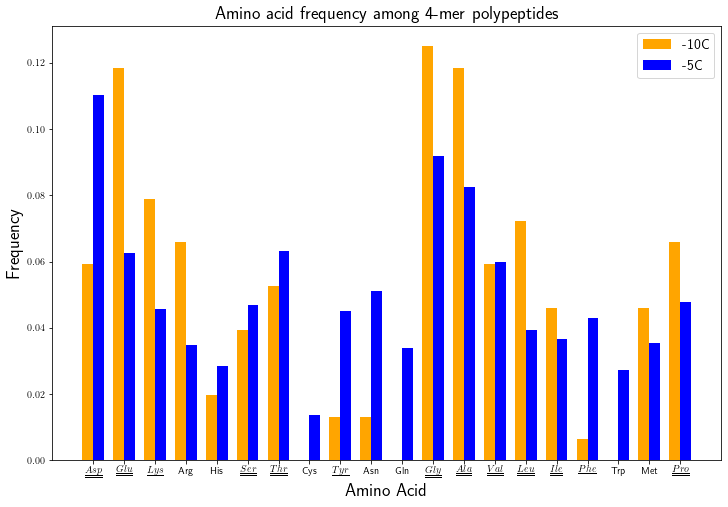

In [48]:

barchart2(t10counts_no_index,t5counts_no_index,4,'-10C','-5C', 0.35, './barplots/4_temp.png')


[2.366523288089581e-06, 0.0042409603351535674, 0.014720325795930966, 0.0614037480710454, 1.0, 0.4810126582278698, 0.00011181094671778372, 0.49860544947435165, 0.2303153829650244, 0.024581987400925445, 1.0, 1.0, 0.27823493466588933, 0.0034874730014450477, 0.3715016117886877, 0.05206911876742596, 0.2303153829650244, 1.0, 0.28353990352726566, 1.0]
[4.73304658e-05 2.12048017e-02 5.88813032e-02 1.53509370e-01
 1.00000000e+00 6.64807266e-01 1.11810947e-03 6.64807266e-01
 4.60630766e-01 8.19399580e-02 1.00000000e+00 1.00000000e+00
 4.72566506e-01 2.12048017e-02 5.71540941e-01 1.48768911e-01
 4.60630766e-01 1.00000000e+00 4.72566506e-01 1.00000000e+00]
['*', '*', ' ', ' ', ' ', ' ', '*', ' ', ' ', ' ', ' ', ' ', ' ', '*', ' ', ' ', ' ', ' ', ' ', ' ']
[0.06504065040650407, 0.17073170731707318, 0.056910569105691054, 0.07317073170731707, 0.0, 0.0, 0.0, 0.016260162601626018, 0.0, 0.0, 0.008130081300813009, 0.17886178861788618, 0.17886178861788618, 0.13008130081300814, 0.032520325203252036, 0.0, 0

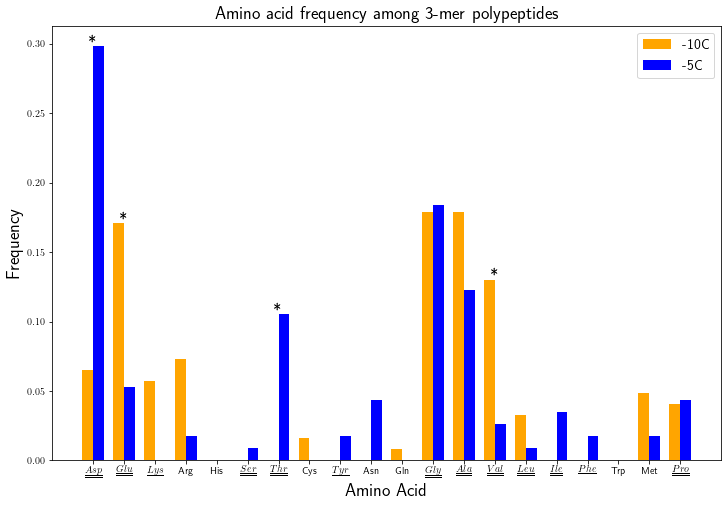

In [50]:
barchart2(t10counts_no_index,t5counts_no_index,3,'-10C','-5C', 0.35, './barplots/3_temp.png')

[5.1238646108996125e-05, 0.11658338822115535, 0.05319770784810824, 0.7881651385564277, 0.7443026213510461, 0.6061003331354682, 0.8401047937343787, 1.0, 0.09816508217460143, 0.04984221942566608, 0.0067854841598334326, 0.28423058423705627, 9.789494359254224e-07, 0.16795416746833947, 0.763160959453862, 0.09459399054385154, 0.0002591349760725683, 0.004227872210152647, 0.3650464614096921, 0.1556473617584878]
[5.12386461e-04 2.33166776e-01 1.51993451e-01 8.75739043e-01
 8.75739043e-01 8.08133778e-01 8.84320836e-01 1.00000000e+00
 2.18144627e-01 1.51993451e-01 2.71419366e-02 4.37277822e-01
 1.95789887e-05 2.79923612e-01 8.75739043e-01 2.18144627e-01
 1.72756651e-03 2.11393611e-02 5.21494945e-01 2.79923612e-01]
['*', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '*', ' ', '*', ' ', ' ', ' ', '*', '*', ' ', ' ']
[11, 13, 19, 9, 6, 10, 17, 2, 3, 9, 22, 26, 50, 15, 6, 5, 5, 0, 5, 19]
[28, 3, 5, 5, 3, 5, 10, 1, 7, 14, 4, 24, 7, 5, 5, 9, 18, 6, 6, 7]


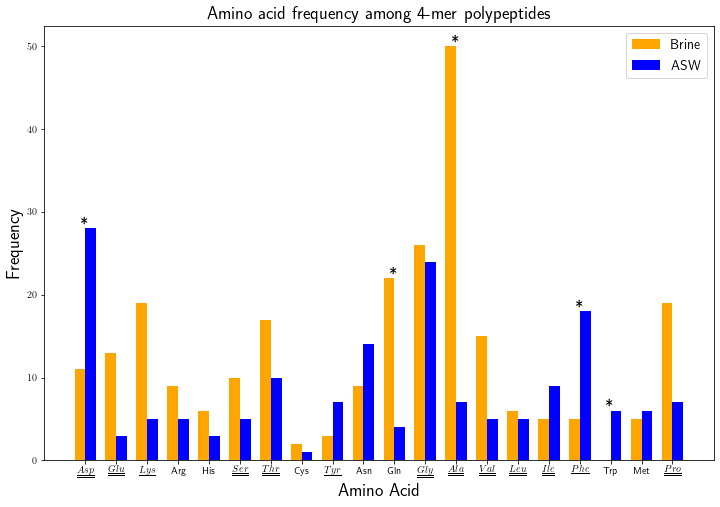

In [45]:
barchart2(b5counts_no_index,s5counts_no_index,4,'Brine','ASW', .45, './barplots/4_salinity.png')

[0.00015197374403718637, 1.0, 0.08714917541538322, 0.3333333333333329, 0.3333333333333329, 1.0, 0.10476190476190521, 1.0, 1.0, 1.0, 1.0, 0.7104437661288853, 0.0002893669270667336, 0.5460764587525148, 0.3333333333333329, 1.0, 1.0, 0.10798122065727715, 0.3333333333333329, 0.65881563893163]
[0.00289367 1.         0.43192488 0.74074074 0.74074074 1.
 0.43192488 1.         1.         1.         1.         1.
 0.00289367 1.         0.74074074 1.         1.         0.43192488
 0.74074074 1.        ]
['*', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '*', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[2, 3, 7, 0, 0, 0, 1, 0, 0, 1, 3, 6, 18, 3, 0, 0, 0, 0, 0, 4]
[10, 1, 0, 1, 1, 0, 3, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 2, 1, 1]


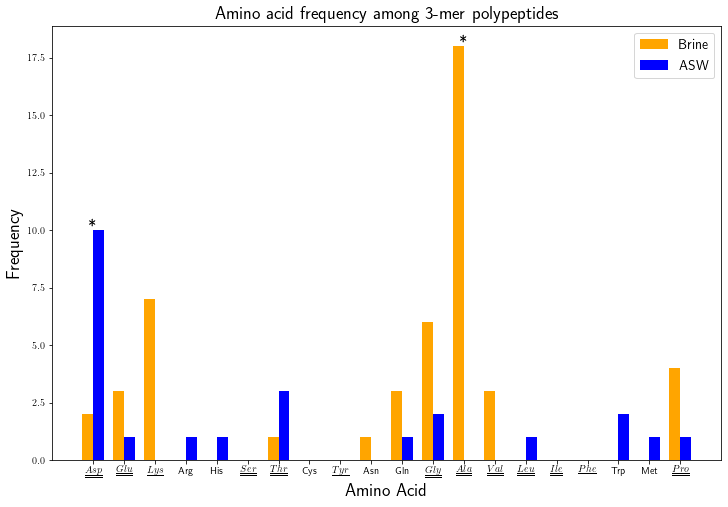

In [46]:
barchart2(b5counts_no_index,s5counts_no_index,3,'Brine','ASW', .45, './barplots/3_salinity.png')